# Analyzing Historical Weather Data — Portland Airport Weather Station USW00024229

We'll answer a few questions:  
     1. Is there a correlation between Max/Min Temperatures (F) and Rain or Snow (in)?  
     2. Have rain and snow amounts changed over time?  

In [1]:
# Dependencies and Setup

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Make plots interactive
#%matplotlib notebook

## Load and clean data

In [2]:
# File to Load 
csv_file = "USW00024229.csv"

# Create a date time format
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

# Read in file to pandas df and convert the date
weather_data = pd.read_csv(csv_file, parse_dates=['DATE'], date_parser=d_parser)

weather_data

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """


,DATE,ACMH,ACSH,AWND,PRCP,PSUN,SNOW,SNWD,TAVG,TMAX,...,WT12,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,1936-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1936-05-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1936-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1936-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1936-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31152,2021-10-27,NaN,NaN,2.9,0.8,NaN,0.0,0.0,12.7,14.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31153,2021-10-28,NaN,NaN,3.7,1.5,NaN,0.0,0.0,15.2,20.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31154,2021-10-29,NaN,NaN,2.8,10.4,NaN,0.0,0.0,14.8,16.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31155,2021-10-30,NaN,NaN,7.2,0.0,NaN,0.0,0.0,10.2,15.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Convert C to F
weather_data['TMAX']=weather_data['TMAX'].apply(lambda x: x * 1.8 + 32)
weather_data['TMIN']=weather_data['TMIN'].apply(lambda x: x * 1.8 + 32)
weather_data['TAVG']=weather_data['TAVG'].apply(lambda x: x * 1.8 + 32)

In [4]:
# Convert mm to inches
weather_data['PRCP']=weather_data['PRCP'].apply(lambda x: x * 0.03937)
weather_data['SNOW']=weather_data['SNOW'].apply(lambda x: x * 0.03937)
weather_data['SNWD']=weather_data['SNWD'].apply(lambda x: x * 0.03937)

In [5]:
# Limit dates to 1940 – 2019
weather_data = weather_data.set_index(['DATE'])
df = weather_data.loc['1940-1-1':'2019-12-31']

In [6]:
# checking lengths
print(df['PRCP'].first_valid_index())
print(df['PRCP'].last_valid_index())
print(df['TMAX'].first_valid_index())
print(df['TMAX'].last_valid_index())

1940-01-01 00:00:00
2019-12-31 00:00:00
1940-01-01 00:00:00
2019-12-31 00:00:00


## 1. Is there a correlation between Max/Min Temperatures (F) and Rain or Snow (in)?
My hypothesis would have been yes, maybe for snow especially. But exploring the data below the answer is no!

In [7]:
#Drop rows missing data needed to find corrrelation stats
corr_df = df.dropna(subset=['PRCP','TMAX','TMIN','SNOW'])
corr_df

,ACMH,ACSH,AWND,PRCP,PSUN,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT12,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
DATE,,,,,,,,,,,,,,,,,,,,,
1940-01-01,NaN,NaN,NaN,0.228346,NaN,0.0,0.0,NaN,57.02,41.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1940-01-02,NaN,NaN,NaN,0.118110,NaN,0.0,0.0,NaN,55.94,42.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1940-01-03,NaN,NaN,NaN,0.448818,NaN,0.0,0.0,NaN,48.92,37.94,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1940-01-04,NaN,NaN,NaN,0.330708,NaN,0.0,0.0,NaN,51.98,42.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1940-01-05,NaN,NaN,NaN,0.051181,NaN,0.0,0.0,NaN,50.00,35.96,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,NaN,NaN,2.0,0.011811,NaN,0.0,0.0,39.38,44.96,37.04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-28,NaN,NaN,3.4,0.000000,NaN,0.0,0.0,43.34,48.02,39.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-29,NaN,NaN,3.8,0.000000,NaN,0.0,0.0,42.98,48.02,39.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
corr_df.count()

ACMH    11261
ACSH    11261
AWND    13147
PRCP    29095
PSUN     6940
SNOW    29095
SNWD    29063
TAVG     5144
TMAX    29095
TMIN    29095
TSUN    12473
WESD     5897
WSFG    13443
WT01     9615
WT02     1569
WT03      518
WT04      264
WT05      670
WT06      202
WT07       18
WT08     3665
WT09       90
WT10        4
WT11        2
WT12        1
WT13     2332
WT14      659
WT15       10
WT16    12673
WT17       50
WT18      834
WT19       10
WT21      240
WT22       88
dtype: int64

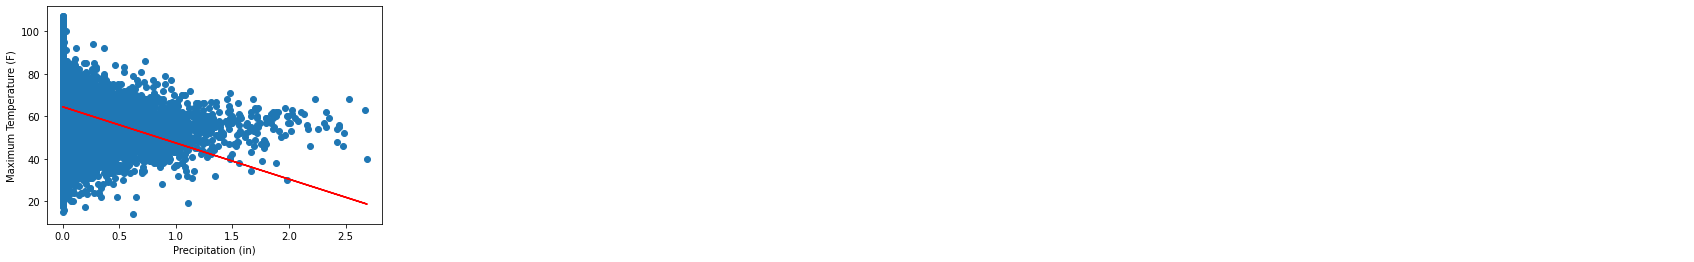

The correlation between both factors is -0.26


In [9]:
# RAIN & MAX TEMP — correlated?
x1 = corr_df['PRCP']
y1 = corr_df['TMAX']
plt.xlabel('Precipitation (in)')
plt.ylabel('Maximum Temperature (F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regress_values = x1 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x1,y1)
plt.plot(x1,regress_values,"r-")
plt.annotate(line_eq,(13,12),fontsize=15,color="red")
plt.show()


#Pearson correlation coefficient 
correlation = st.pearsonr(x1,y1)
print(f"The correlation between both factors is {round(correlation[0],2)}")

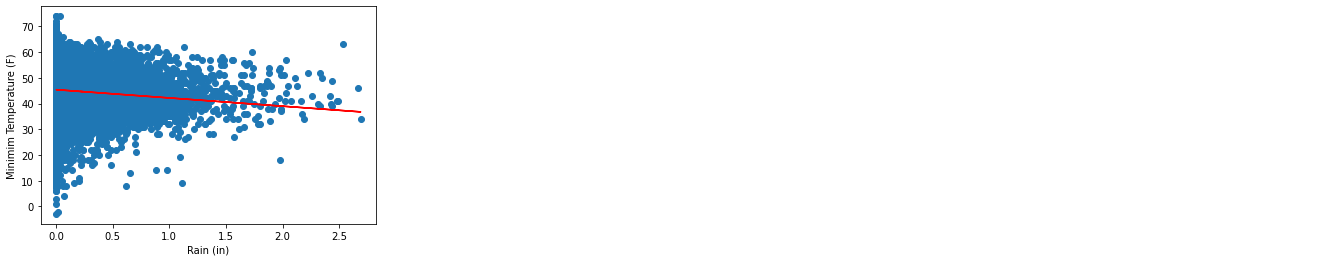

r-squared: 0.005358150547574394
The correlation between both factors is -0.07


In [10]:
# RAIN & MIN TEMP — correlated?
x2 = corr_df['PRCP']
y2 = corr_df['TMIN']
plt.xlabel('Rain (in)')
plt.ylabel('Minimim Temperature (F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x2, y2)
regress_values = x2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2,y2)
plt.plot(x2,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.show()
print("r-squared:", rvalue**2)


#Pearson correlation coefficient 
correlation = st.pearsonr(x2,y2)
print(f"The correlation between both factors is {round(correlation[0],2)}")

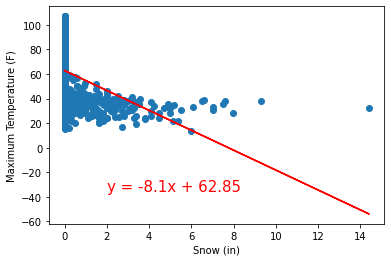

r-squared: 0.01796486274564848
The correlation between both factors is -0.13


In [11]:
# SNOW & MAX TEMP — correlated?
x3 = corr_df['SNOW']
y3 = corr_df['TMAX']
plt.xlabel('Snow (in)')
plt.ylabel('Maximum Temperature (F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x3, y3)
regress_values = x3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x3,y3)
plt.plot(x3,regress_values,"r-")
plt.annotate(line_eq,(2,-35),fontsize=15,color="red")
plt.show()
print("r-squared:", rvalue**2)

#Pearson correlation coefficient 
correlation = st.pearsonr(x3,y3)
print(f"The correlation between both factors is {round(correlation[0],2)}")

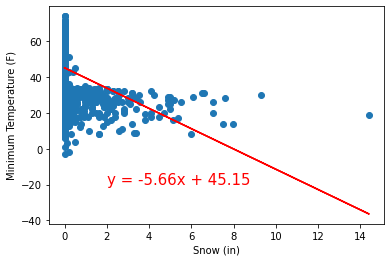

r-squared: 0.018925328960760743
The correlation between both factors is -0.14


In [12]:
# SNOW & MIN TEMP — correlated?
x4 = corr_df['SNOW']
y4 = corr_df['TMIN']
plt.xlabel('Snow (in)')
plt.ylabel('Minimum Temperature (F)')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x4, y4)
regress_values = x4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x4,y4)
plt.plot(x4,regress_values,"r-")
plt.annotate(line_eq,(2,-20),fontsize=15,color="red")
plt.show()
print("r-squared:", rvalue**2)

#Pearson correlation coefficient 
correlation = st.pearsonr(x4,y4)
print(f"The correlation between both factors is {round(correlation[0],2)}")

## Have rain and snow amounts changed over time?  
My hypothesis is we get more rain and less snow.

In [13]:
# Create a new dataframe for binning
bins_df = weather_data[['PRCP','SNOW','TMAX','TMIN',]].copy()


In [14]:
# Make DATE a column instead of index
bins_df.reset_index(level=0, inplace=True)
bins_df

,DATE,PRCP,SNOW,TMAX,TMIN
0,1936-05-01,NaN,NaN,NaN,NaN
1,1936-05-02,NaN,NaN,NaN,NaN
2,1936-05-03,NaN,NaN,NaN,NaN
3,1936-05-04,NaN,NaN,NaN,NaN
4,1936-05-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...
31152,2021-10-27,0.031496,0.0,57.92,51.98
31153,2021-10-28,0.059055,0.0,69.08,53.06
31154,2021-10-29,0.409448,0.0,62.06,42.98
31155,2021-10-30,0.000000,0.0,60.08,39.02


In [15]:
# Create the bins in which Data will be held
bins = [1940, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019]

# Create the names for the five bins
group_names = ["1940s", "1950s", "1960s", "1970s", "1980s", "1990s", "2000s", "2010s"]
bins_df["DEC"] = pd.cut(bins_df.DATE.dt.year, bins, labels=group_names, include_lowest=True)


In [16]:
bins_df.dtypes

DATE    datetime64[ns]
PRCP           float64
SNOW           float64
TMAX           float64
TMIN           float64
DEC           category
dtype: object

In [17]:
# Create a GroupBy object based upon "DEC" the decades
bins_group = bins_df.groupby("DEC")

# Find how many rows fall into each bin
print(bins_group["DEC"].count())

DEC
1940s    3653
1950s    3652
1960s    3653
1970s    3652
1980s    3653
1990s    3652
2000s    3653
2010s    3652
Name: DEC, dtype: int64


In [18]:
## Code used to check for error in the 1940s with 3894 rows which was too many, needed to update bins variable above
group1 = bins_group.get_group("1940s")
print(group1)
group2 = bins_group.get_group("1950s")
print(group2)
group3 = bins_group.get_group("2010s")
print(group3)

           DATE      PRCP  SNOW   TMAX   TMIN    DEC
1267 1940-01-01  0.228346   0.0  57.02  41.00  1940s
1268 1940-01-02  0.118110   0.0  55.94  42.98  1940s
1269 1940-01-03  0.448818   0.0  48.92  37.94  1940s
1270 1940-01-04  0.330708   0.0  51.98  42.98  1940s
1271 1940-01-05  0.051181   0.0  50.00  35.96  1940s
...         ...       ...   ...    ...    ...    ...
4915 1949-12-27  0.000000   0.0  53.06  44.06  1940s
4916 1949-12-28  0.000000   0.0  53.96  42.98  1940s
4917 1949-12-29  0.499999   0.0  53.06  35.06  1940s
4918 1949-12-30  0.291338   0.0  42.98  33.98  1940s
4919 1949-12-31  0.070866   0.0  42.08  35.06  1940s

[3653 rows x 6 columns]
           DATE      PRCP     SNOW   TMAX   TMIN    DEC
4920 1950-01-01  0.090551  1.29921  35.96  24.98  1950s
4921 1950-01-02  0.000000  0.00000  28.04  17.96  1950s
4922 1950-01-03  0.220472  2.20472  33.08  15.98  1950s
4923 1950-01-04  0.031496  0.19685  32.00  24.98  1950s
4924 1950-01-05  0.118110  0.00000  41.00  26.06  1950s
...

In [19]:
# New df by sum of rain/snow amounts
prcp_df = bins_group[['PRCP','SNOW']].sum()

In [20]:
# New df by average of high/low temp amounts
temp_df = bins_group[['TMAX','TMIN']].mean()

In [21]:
prcp_df.reset_index(level=0, inplace=True)
prcp_df

,DEC,PRCP,SNOW
0,1940s,371.306344,47.08652
1,1950s,390.837801,116.57457
2,1960s,366.270921,80.27543
3,1970s,373.263033,37.67709
4,1980s,353.920552,44.21251
5,1990s,396.928340,51.61407
6,2000s,326.184387,45.78731
7,2010s,384.361436,39.56685


In [22]:
temp_df.reset_index(level=0, inplace=True)
temp_df

,DEC,TMAX,TMIN
0,1940s,62.343132,44.670857
1,1950s,61.283072,43.679447
2,1960s,62.025163,43.707638
3,1970s,62.587530,44.390575
4,1980s,62.959015,45.240372
5,1990s,63.498719,46.030832
6,2000s,63.065152,45.841916
7,2010s,63.665164,46.651418


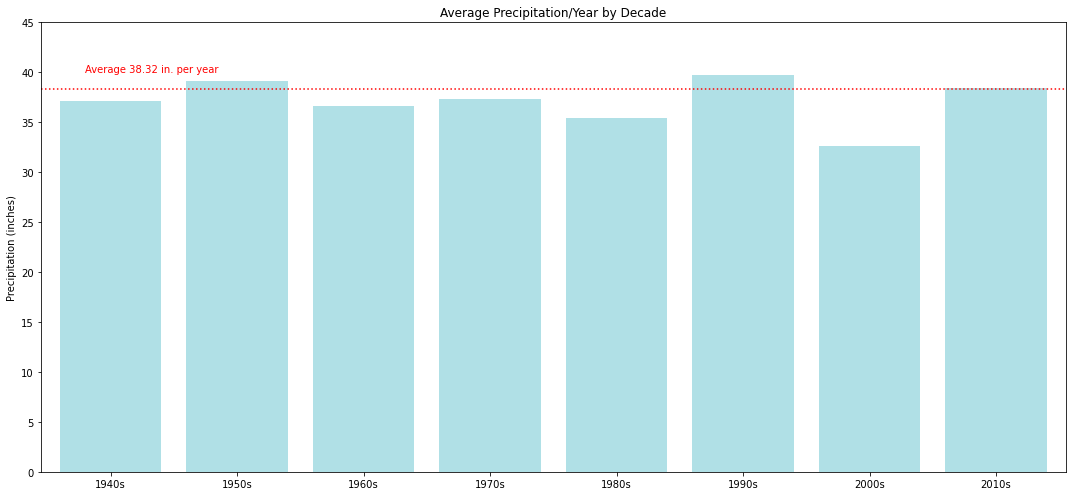

In [23]:
# One way to set the length of the x axis
x_axis = np.arange(len(prcp_df))

# Space out the graphic
plt.figure(figsize=(15,7))

# Create bar x y inputs
decade = prcp_df['DEC']
# Calculate average rain per year for that decade
rain = (prcp_df['PRCP']/10) 
plt.bar(decade, rain, color='powderblue', align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, decade)

# Labeling
plt.title('Average Precipitation/Year by Decade')
plt.ylabel('Precipitation (inches)')

# Plot average rain as a line using the sum of total rain divided by 80 years
avg_rain = weather_data['PRCP'].sum()/80
plt.axhline(y=avg_rain, color='red', ls='dotted')
plt.annotate(f"Average {round(avg_rain, 2)} in. per year", (-.2,40), color='red')

# Sizing
plt.ylim(0,45)
plt.xlim(-.55,len(decade)-.45)
plt.tight_layout()
plt.show()


In [24]:
print(avg_rain)

38.3180336


In [25]:
print(rain)

0    37.130634
1    39.083780
2    36.627092
3    37.326303
4    35.392055
5    39.692834
6    32.618439
7    38.436144
Name: PRCP, dtype: float64


In [27]:
print(rain.mean())

37.03841017500004


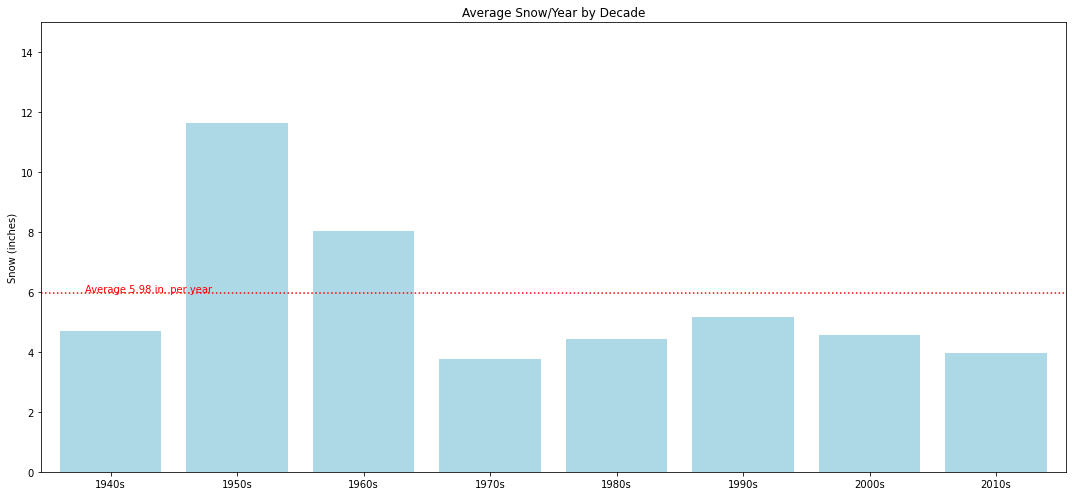

In [32]:
# One way to set the length of the x axis
x_axis = np.arange(len(prcp_df))

# Space out the graphic
plt.figure(figsize=(15,7))

# Create bar x y inputs
decade = prcp_df['DEC']
# Calculate average rain per year for that decade
rain = (prcp_df['SNOW']/10) 
plt.bar(decade, rain, color='lightblue', align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, decade)

# Labeling
plt.title('Average Snow/Year by Decade')
plt.ylabel('Snow (inches)')

# Plot average rain as a line using the sum of total rain divided by 80 years
avg_snow = weather_data['SNOW'].sum()/80
plt.axhline(y=avg_snow, color='red', ls='dotted')
plt.annotate(f"Average {round(avg_snow, 2)} in. per year", (-.2,6), color='red')

# Sizing
plt.ylim(0,15)
plt.xlim(-.55,len(decade)-.45)
plt.tight_layout()
plt.show()